In [2]:
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/Alex-Mak-MCW/SpotifyDataScienceProject/main/Data/processed_data.csv")

In [3]:
# make a new feature (mood) based on valence

df['mood']= df['valence'].apply(lambda x: 0 if x < 0.5 else 1)

df

,track_name,artist,album,release_date,duration,popularity,explicit,lyrics,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mood
0,Blinding Lights,The Weeknd,After Hours,2020-03-20,200040,90,0,yeah ve tryna call ve long enough maybe show l...,0.514,0.730,...,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4.0,0
1,Shape of You,Ed Sheeran,÷ (Deluxe),2017-03-03,233712,86,0,club nt best place find lover bar go mm friend...,0.825,0.652,...,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4.0,1
2,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,2019-05-17,182160,89,0,m going time fear s one save nothing really ...,0.501,0.405,...,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,4.0,0
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Hollywood's Bleeding,2019-09-06,157560,85,0,2 post malone wow 3 saweetie tap feat post ma...,0.755,0.522,...,-4.368,1.0,0.0575,0.53300,0.000000,0.0685,0.925,89.960,4.0,1
4,Starboy,The Weeknd,Starboy,2016-11-25,230453,91,1,ayy m tryna put worst mood ah p1 cleaner chur...,0.679,0.587,...,-7.015,1.0,0.2760,0.14100,0.000006,0.1370,0.486,186.003,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,512,Mora,Primer Dia de Clases,2021-02-05,193636,75,1,NaN,0.818,0.673,...,-7.542,0.0,0.1480,0.34800,0.000000,0.1720,0.695,87.961,4.0,1
2451,Diosa,Myke Towers,Easy Money Baby,2020-01-24,214013,72,1,NaN,0.801,0.745,...,-3.733,0.0,0.0630,0.39800,0.006030,0.1530,0.245,104.965,4.0,0
2452,A-Punk,Vampire Weekend,Vampire Weekend,2008-01-29,137760,70,0,johanna drove slowly city hudson river filled ...,0.551,0.819,...,-4.489,1.0,0.0525,0.01030,0.043700,0.1530,0.846,174.917,4.0,1
2453,TQM,Fuerza Regida,TQM,2023-05-19,158965,78,1,NaN,0.786,0.853,...,-4.955,0.0,0.0589,0.27300,0.000000,0.1060,0.963,125.107,3.0,1


In [4]:
#  change duration from ms to s --> / 1000
df['duration']=df['duration']/1000
df['duration']

0       200.040
1       233.712
2       182.160
3       157.560
4       230.453
         ...   
2450    193.636
2451    214.013
2452    137.760
2453    158.965
2454    236.215
Name: duration, Length: 2455, dtype: float64

In [5]:
# testing=df.copy()
print("Number of null values in the dataset:\n{0}".format(df.isnull().sum()))
# 375 lyrics --> drop all null

df.dropna(subset=['lyrics'], inplace=True)

print("Number of null values in the dataset:\n{0}".format(df.isnull().sum()))

Number of null values in the dataset:
track_name            0
artist                0
album                 0
release_date          0
duration              0
popularity            0
explicit              0
lyrics              375
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
mood                  0
dtype: int64
Number of null values in the dataset:
track_name          0
artist              0
album               0
release_date        0
duration            0
popularity          0
explicit            0
lyrics              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo      

In [6]:
# text
# * label encdoing (DONE)
# * Text encoding
#     * count vectorization
#     * TF-IDF character level
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

testing=df.copy()

# Custom transformer to select text column
get_text_data = FunctionTransformer(lambda x: x['lyrics'], validate=False)

# # Pipeline for text processing
# text_pipeline = Pipeline([
#     ('selector', get_text_data),
#     ('features', FeatureUnion([
#         ('tfidf', Pipeline([
#             ('count', CountVectorizer()),
#             ('tfidf', TfidfTransformer())
#         ])),
#         ('count', CountVectorizer())
#     ]))
# ])
text_pipeline = Pipeline([
    ('selector', get_text_data),
    ('features', FeatureUnion([
        ('tfidf', Pipeline([
            ('count', CountVectorizer()),
            ('tfidf', TfidfTransformer())
        ]))
    ]))
])

# Transform text data
text_features = text_pipeline.fit_transform(testing)

# Get feature names from CountVectorizer
# count_vectorizer = text_pipeline.named_steps['features'].transformer_list[1][1]
# count_feature_names = count_vectorizer.get_feature_names_out()

# Get feature names from TF-IDF
tfidf_vectorizer = text_pipeline.named_steps['features'].transformer_list[0][1].named_steps['count']
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Combine feature names
# feature_names = count_feature_names + tfidf_feature_names
feature_names = tfidf_feature_names

print("Feature Names:", feature_names)

Feature Names: ['00' '000' '00000' ... 'zy' 'zydeco' 'zz']


In [7]:
len(text_features.toarray())

2080

In [8]:
df.shape

(2080, 21)

In [9]:
# Reset index of both DataFrames
df.reset_index(drop=True, inplace=True)
# Set feature names as column names for text_features_df
text_features_df = pd.DataFrame(text_features.toarray(), columns=tfidf_feature_names)

# Perform a left merge to align rows properly
merged_df = pd.merge(df, text_features_df, left_index=True, right_index=True, how='left', suffixes=('', '_text'))


print(merged_df)

                                         track_name           artist  \
0                                   Blinding Lights       The Weeknd   
1                                      Shape of You       Ed Sheeran   
2                                 Someone You Loved    Lewis Capaldi   
3     Sunflower - Spider-Man: Into the Spider-Verse      Post Malone   
4                                           Starboy       The Weeknd   
...                                             ...              ...   
2075     When Love Takes Over (feat. Kelly Rowland)     David Guetta   
2076                                  Happiest Year     Jaymes Young   
2077                        Smile (with The Weeknd)       Juice WRLD   
2078                                          Saved           Khalid   
2079                                         A-Punk  Vampire Weekend   

                                        album release_date  duration  \
0                                 After Hours   2020-03-20   20

In [10]:
merged_df.drop('lyrics', axis=1, inplace=True)

In [11]:
# merged_df['release_date']

In [12]:
merged_df.drop('release_date', axis=1, inplace=True)

In [12]:
merged_df

,track_name,artist,album,duration,popularity,explicit,danceability,energy,key,loudness,...,zurich,zurst,zusammenfassungresmee,zusammengehalten,zuu,zw1tch,zwidy,zy,zydeco,zz
0,Blinding Lights,The Weeknd,After Hours,200.040,90,0,0.514,0.730,1.0,-5.934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Shape of You,Ed Sheeran,÷ (Deluxe),233.712,86,0,0.825,0.652,1.0,-3.183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,182.160,89,0,0.501,0.405,1.0,-5.679,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Hollywood's Bleeding,157.560,85,0,0.755,0.522,2.0,-4.368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Starboy,The Weeknd,Starboy,230.453,91,1,0.679,0.587,7.0,-7.015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,When Love Takes Over (feat. Kelly Rowland),David Guetta,One More Love,191.000,74,0,0.675,0.862,11.0,-4.614,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2076,Happiest Year,Jaymes Young,Feel Something (Deluxe),228.442,74,0,0.502,0.168,1.0,-14.061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2077,Smile (with The Weeknd),Juice WRLD,Legends Never Die,196.180,69,1,0.694,0.685,6.0,-6.535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2078,Saved,Khalid,American Teen,206.533,64,0,0.739,0.448,10.0,-10.280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# data splitting
from sklearn.model_selection import train_test_split

new_df=merged_df.copy()

y=new_df.loc[:, new_df.columns =='mood'].values.ravel()

# drop valence (too strong) and mood(y):
new_df.drop(['valence','mood'], axis=1, inplace=True)


# x=merged_df.loc[:, merged_df.columns !='mood']
# x = merged_df.iloc[:, 3:]

# 1. just without lyrics (too strong--> even 1 % training got almost perfect training accuracy)
# x = new_df.iloc[:, 3:17]

# 2. just lyrics
# x = new_df.iloc[:, 17:]

# 3. both:
x = new_df.iloc[:, 3:]

# print(x)


# Split data into training and testing sets
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

# split the 20% by half (10% test, 10% validation)
X_val, X_test, y_val, y_test=train_test_split(X_test,y_test,test_size=0.5)

In [15]:
# data splitting + test (15s)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# new_df=merged_df.copy()

# y=new_df.loc[:, new_df.columns =='mood'].values.ravel()

# # drop valence (too strong) and mood(y):
# new_df.drop(['valence','mood'], axis=1, inplace=True)


# # x=merged_df.loc[:, merged_df.columns !='mood']
# # x = merged_df.iloc[:, 3:]

# # 1. just without lyrics (too strong--> even 1 % training got almost perfect training accuracy)
# # x = new_df.iloc[:, 3:17]

# # 2. just lyrics
# # x = new_df.iloc[:, 17:]

# # 3. both:
# x = new_df.iloc[:, 3:]

# # print(x)


# # Split data into training and testing sets
# X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

# # split the 20% by half (10% test, 10% validation)
# X_val, X_test, y_val, y_test=train_test_split(X_test,y_test,test_size=0.5)

# Initialize and train the model with L1 regularization (Lasso)
LR = LogisticRegression()  # C is the inverse of regularization strength
LR.fit(X_train, y_train)

# Predict on the test set
y_pred_l1 = LR.predict(X_test)

# Evaluate the model
accuracy_LR = accuracy_score(y_test, y_pred_l1)
# print("Accuracy with L1 regularization:", accuracy_l1)
print("Training (Pre-tuned) Accuracy with LR: {}".format(accuracy_LR))

# # Initialize and train the model with L2 regularization (Ridge)
# model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)  # C is the inverse of regularization strength
# model_l2.fit(X_train, y_train)

# # Predict on the test set
# y_pred_l2 = model_l2.predict(X_test)

# # Evaluate the model
# accuracy_l2 = accuracy_score(y_test, y_pred_l2)
# # print("Accuracy with L2 regularization:", accuracy_l2)
# print("Training (Pre-tuned) Accuracy with L2: {}".format(accuracy_l2))


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training (Pre-tuned) Accuracy with LR: 0.6826923076923077


In [17]:
# # tuning

# from sklearn.pipeline import Pipeline
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.feature_selection import SelectFromModel
# from sklearn.model_selection import GridSearchCV

# # 4.1 Define Pipeline
# LR_pipeline = Pipeline([
#     # Variable Selection and Hyperparameter Tuning
#     ('feature_selection', SelectFromModel(LogisticRegression())),
#     ('classifier', LogisticRegression())
# ])

# # 4.2 define param grid for pipeline only
# LR_pipeline_param_grid = {
#     'classifier__penalty':['l1','l2'],
#     'classifier__C': [ 0.01,  0.1,  1],
#     'classifier__tol': [1e-3, 1e-2, 0.1],
#     # 'classifier__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
#     'classifier__max_iter': [500, 1000, 5000]
# }


# LR_pipeline.fit(X_val,y_val)

# # Get the selected features
# LR_selected_features = LR_pipeline.named_steps['feature_selection'].get_support()

# # Print selected features
# print("Selected Features for Decision Tree:")
# for feature, selected in zip(X_val.columns, LR_selected_features):
#     if selected:
#         print(feature)

# # 4.3 Perform Grid Search CV
# LR_grid_search = GridSearchCV(LR_pipeline, LR_pipeline_param_grid, cv=5)

# # 4.4 refit the model with grid search
# LR_grid_search.fit(X_val, y_val)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [18]:
# 12 mins
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define Pipeline
LR_pipeline = Pipeline([
    # Variable Selection and Hyperparameter Tuning
    ('feature_selection', SelectFromModel(LogisticRegression())),
    ('classifier', LogisticRegression())
])

# Define param grid for pipeline only
LR_pipeline_param_grid = {
    'classifier__penalty':['l1','l2'],
    'classifier__C': [ 0.01,  0.1,  1],
    'classifier__tol': [1e-3, 1e-2, 0.1],
    'classifier__max_iter': [500, 1000, 5000]
}

# Perform Grid Search CV
LR_grid_search = GridSearchCV(LR_pipeline, LR_pipeline_param_grid, cv=5)
LR_grid_search.fit(X_val, y_val)

# Retrieve the best estimator after grid search CV is fitted
best_LR_estimator = LR_grid_search.best_estimator_

# Access the coefficients of the Logistic Regression model
lr_coefficients = best_LR_estimator.named_steps['classifier'].coef_[0]

# Identify the features with the highest absolute coefficients
top_indices = lr_coefficients.argsort()[-10:][::-1]  # Get indices of top 10 features
top_features = [X_val.columns[i] for i in top_indices]  # Get feature names from indices

# Extract the names of the top 10 features
print("Top 10 Most Important Features:")
for feature in top_features:
    print(feature)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Top 10 Most Important Features:
energy
danceability
liveness
speechiness
bandokay
agnes
29
amake
arrestin
barrie


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# # We will also use a pipeline here to select the most important features and perform classification using Random Forest
# XGB_pipeline = Pipeline([
#     ('feature_selection', SelectFromModel(XGBClassifier(random_state=42))),
#     ('classifier', XGB)
# ])

# # Define param grid
# # Used to include more parameter values but it took so long (> 1 hour)
# # Now using only a few more common parameter values for Grid Search
# # xgb_pipeline_param_grid= {
# #     'classifier__n_estimators': [50, 100],
# #     'feature_selection__estimator__bootstrap' : [True, False],
# #     'classifier__max_features': ['sqrt', 'log2'],
# #     'classifier__max_depth': [6, 9],
# #     'classifier__criterion': ['gini', 'entropy', 'log_loss'],
# #     'classifier__min_samples_split' : [2, 6, 9],
# #     'classifier__min_samples_leaf' : [1, 6, 9]
# # }

# # need to reduce next time
# XGB_pipeline_param_grid = {
#     'feature_selection__estimator__max_depth': [3, 6],
#     # 'feature_selection__threshold': ['mean', 'median'],
#     'classifier__learning_rate': [0.1, 0.01],
#     'classifier__gamma': [0, 0.1],
#     'classifier__min_child_weight': [1, 5],

#     # 'classifier__n_estimators': [50, 100],
#     # 'classifier__max_depth': [6, 9],
#     # 'classifier__subsample': [0.8, 1.0],
#     # 'classifier__colsample_bytree': [0.8, 1.0],
#     # 'classifier__reg_lambda': [0, 0.1]
# }

# XGB_pipeline.fit(X_val,y_val)

# # Get the feature importance scores
# feature_importances = XGB_pipeline.named_steps['feature_selection'].estimator_.feature_importances_

# # Map the feature importance scores to their corresponding feature names
# feature_importance_map = dict(zip(X_val.columns, feature_importances))

# # Sort the features by their importance scores and select the top 10 features
# top_10_features = sorted(feature_importance_map.items(), key=lambda x: x[1], reverse=True)[:10]

# # Print the top 10 features
# print("Top 10 Selected Features For XGBoost:")
# for feature, importance in top_10_features:
#     print(f"{feature}: {importance}")

# # Perform Grid Search CV with cv=5
# XGB_grid_search = GridSearchCV(XGB_pipeline, XGB_pipeline_param_grid, cv=5, n_jobs=-1)

# # Fit the model with grid search

# # LR_grid_search.fit(X_val, y_val)
# XGB_grid_search.fit(X_val, y_val)

In [19]:
# 32 second
# 4.5 obtain the best parameter from the pipeline
LR_best_params = LR_grid_search.best_params_
print(LR_best_params)

# 5. Refit the model with the best parameters
LR_pipeline.set_params(**LR_best_params)
LR_pipeline.fit(X_train, y_train)

# 6. Make predictions of the actual model and obtain accuracy
LR_y_pred = LR_pipeline.predict(X_test)

# 6.1 Calculate accuracy: around
LR_pipeline_accuracy = LR_pipeline.score(X_test, y_test)
print("Testing (Post-tuned) Accuracy from automated tuning on LR: {}".format(LR_pipeline_accuracy))

{'classifier__C': 1, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__tol': 0.001}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Testing (Post-tuned) Accuracy from automated tuning on LR: 0.7067307692307693


In [20]:
print("For Logistic regression:")

print("\nBefore hyperparameter tuning:")
print("Training (Pre-tuned) Accuracy with LR: {}".format(accuracy_LR))
print("\nAfter hyperparameter tuning:")
print("Testing (Post-tuned) Accuracy from automated tuning on LR: {}".format(LR_pipeline_accuracy))
print("---------------------------------------")
print("Training Accuracy: \t{0}% \t({1})".format(LR_pipeline.score(X_train, y_train)*100, LR_pipeline.score(X_train, y_train)))
print("Test Accuracy: \t\t{0}% \t({1})".format(LR_pipeline.score(X_test, y_test)*100, LR_pipeline.score(X_test, y_test)))

For Logistic regression:

Before hyperparameter tuning:
Training (Pre-tuned) Accuracy with LR: 0.6826923076923077

After hyperparameter tuning:
Testing (Post-tuned) Accuracy from automated tuning on LR: 0.7067307692307693
---------------------------------------
Training Accuracy: 	84.2548076923077% 	(0.8425480769230769)
Test Accuracy: 		70.67307692307693% 	(0.7067307692307693)


              precision    recall  f1-score   support

           0       0.75      0.70      0.72       114
           1       0.66      0.71      0.69        94

    accuracy                           0.71       208
   macro avg       0.71      0.71      0.71       208
weighted avg       0.71      0.71      0.71       208



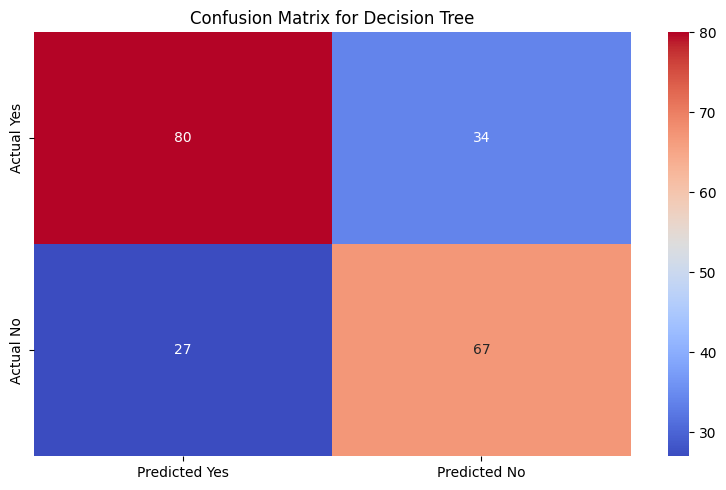

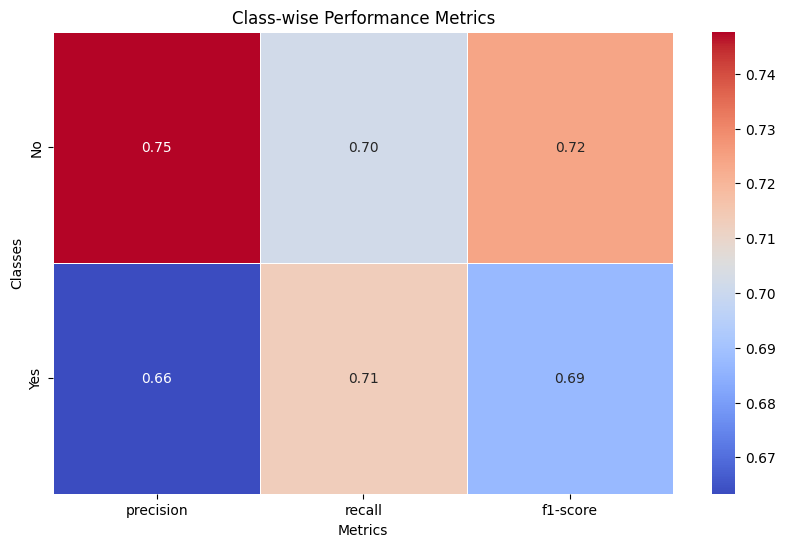

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# 7. Visualize the output
# 7.1 classification report
LR_classification_report=classification_report(y_test, LR_y_pred)
print(LR_classification_report)

# 7.2 Confusion matrix with seaborn heatmap
LR_conf_matrix=confusion_matrix(y_test, LR_y_pred)
# Seaborn heatmap
plt.figure(figsize=(8,5))
sns.heatmap(LR_conf_matrix, annot=True, fmt="d", cmap='coolwarm', xticklabels=['Predicted Yes', 'Predicted No'], yticklabels=['Actual Yes', 'Actual No'])
plt.title('Confusion Matrix for Decision Tree')
plt.tight_layout()
plt.savefig("LR_confusion_matrix.png")

# 7.3 Visualize classification report better: Class-wise Performance Metrics
LR_classification_report_2 = classification_report(y_test, LR_y_pred, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
class_metrics = {metric: [LR_classification_report_2[class_name][metric] for class_name in ['0','1']] for metric in metrics}

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=pd.DataFrame(class_metrics, index=['No','Yes']), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Class-wise Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.savefig("LR_performance_metrics.png")
plt.show()

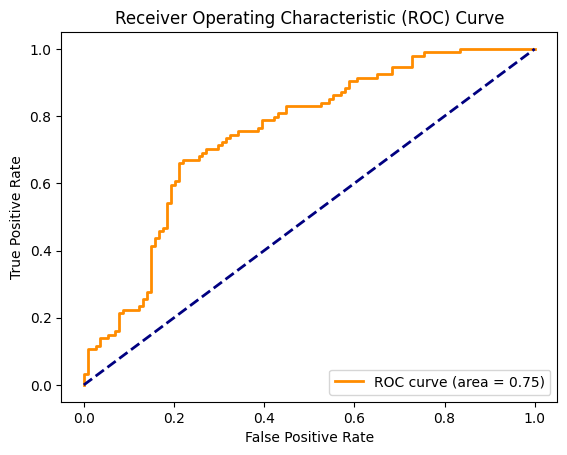

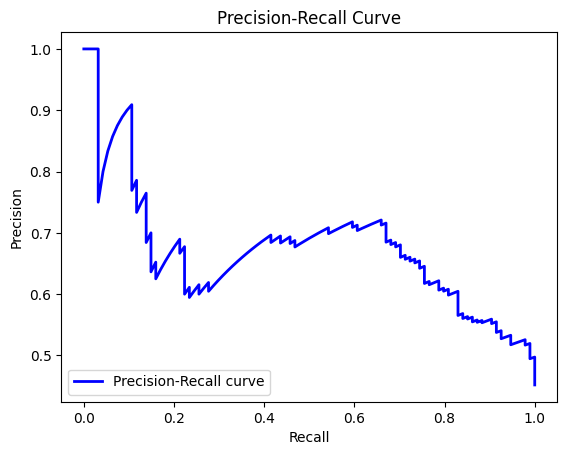

In [23]:
# More visualization
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# NOTE: only choose 1 of the following 2 methods:

# manual hyperparameter tuning
# LR_y_scores = LR_best_model.predict_proba(LR_X_test)[:, 1]

# automate hyperparameter tuning (pipeline)
LR_y_scores=LR_pipeline.predict_proba(X_test)[:, 1]


# 7.4 ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, LR_y_scores)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig("LR_roc_curve.png")

# 7.5 Precision-Recall Curve (Keep it for now, can be deleted)
precision, recall, thresholds = precision_recall_curve(y_test, LR_y_scores)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.savefig("LR_precision_recall_curve.png")
plt.show()

In [88]:
# # uncomment if not done earlier
# new_df=merged_df.copy()

# y=new_df.loc[:, new_df.columns =='mood'].values.ravel()

# # drop valence (too strong) and mood(y):
# new_df.drop(['valence','mood'], axis=1, inplace=True)

# # x=merged_df.loc[:, merged_df.columns !='mood']
# # x = merged_df.iloc[:, 3:]

# # 1. just without lyrics (too strong--> even 1 % training got almost perfect training accuracy)
# # x = new_df.iloc[:, 3:17]

# # 2. just lyrics
# # x = new_df.iloc[:, 17:]

# # 3. both:
# x = new_df.iloc[:, 3:]

In [89]:
# # Split data into training and testing sets
# X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

# # split the 20% by half (10% test, 10% validation)
# X_val, X_test, y_val, y_test=train_test_split(X_test,y_test,test_size=0.5)

In [24]:
# XGBoost

# (1.5 mins)

# data splitting + test
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

XGB = XGBClassifier(random_state=42)
XGB.fit(X_train, y_train)

# Predict on the test set
XGB_pred = XGB.predict(X_test)

# Evaluate the model
accuracy_XGB = accuracy_score(y_test, XGB_pred)
print("Training (Pre-tuned) Accuracy with XGB: {}".format(accuracy_XGB))


Training (Pre-tuned) Accuracy with XGB: 0.6778846153846154


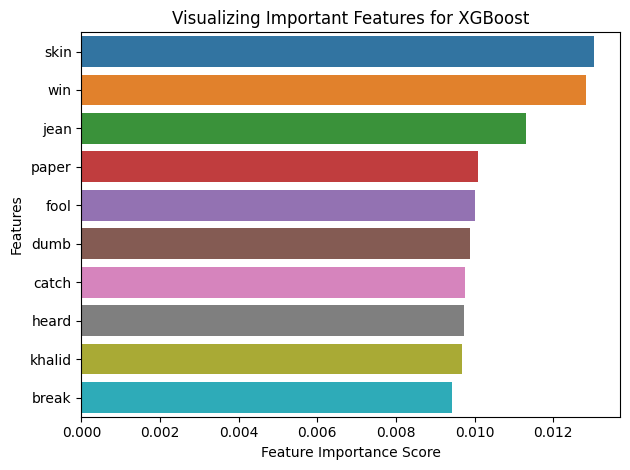

In [25]:
# Make predictions on y using training data's x
# xgb_train_pred = xgb.predict(X_test)

# Measure the importance of each features to further improve the model
XGB_feature_imp = pd.Series(XGB.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot the features' importance using a barplot
sns.barplot(x=XGB_feature_imp.head(10), y=XGB_feature_imp.head(10).index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for XGBoost")
plt.tight_layout()

# plt.savefig("XGBoost_feature_importance.png")
plt.show()

In [ ]:
# We will also use a pipeline here to select the most important features and perform classification using Random Forest
XGB_pipeline = Pipeline([
    ('feature_selection', SelectFromModel(XGBClassifier(random_state=42))),
    ('classifier', XGB)
])
 
# Define param grid
# Used to include more parameter values but it took so long (> 1 hour)
# Now using only a few more common parameter values for Grid Search

# need to reduce next time
XGB_pipeline_param_grid = {
    'feature_selection__estimator__max_depth': [3, 6],
    # 'feature_selection__threshold': ['mean', 'median'],
    'classifier__learning_rate': [0.1, 0.01],
    'classifier__gamma': [0, 0.1],
    'classifier__min_child_weight': [1, 5],

    # 'classifier__n_estimators': [50, 100],
    # 'classifier__max_depth': [6, 9],
    # 'classifier__subsample': [0.8, 1.0],
    # 'classifier__colsample_bytree': [0.8, 1.0],
    # 'classifier__reg_lambda': [0, 0.1]
}

XGB_pipeline.fit(X_val,y_val)

# Get the feature importance scores
feature_importances = XGB_pipeline.named_steps['feature_selection'].estimator_.feature_importances_

# Map the feature importance scores to their corresponding feature names
feature_importance_map = dict(zip(X_val.columns, feature_importances))

# Sort the features by their importance scores and select the top 10 features
top_10_features = sorted(feature_importance_map.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 features
print("Top 10 Selected Features For XGBoost:")
for feature, importance in top_10_features:
    print(f"{feature}: {importance}")

# Perform Grid Search CV with cv=5
XGB_grid_search = GridSearchCV(XGB_pipeline, XGB_pipeline_param_grid, cv=5, n_jobs=-1)

# Fit the model with grid search

# LR_grid_search.fit(X_val, y_val)
XGB_grid_search.fit(X_val, y_val)

Top 10 Selected Features For XGBoost:
long: 0.048456452786922455
rock: 0.037513330578804016
money: 0.03493710607290268
tight: 0.030953042209148407
kill: 0.029869752004742622
change: 0.029684090986847878
am: 0.0284099318087101
wake: 0.02697155997157097
front: 0.026290923357009888
wait: 0.026084717363119125


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
import joblib

# Save the trained model
joblib.dump(XGB_grid_search.best_estimator_, 'xgboost_model.pkl')
joblib.dump(XGB_grid_search.best_params_, 'xgboost_best_params.joblib')

# Load the saved model
#loaded_model = joblib.load('xgboost_model.pkl')
#loaded_best_params = joblib.load('xgboost_best_params.joblib')

In [ ]:
from google.colab import files
files.download('xgboost_best_params.joblib')

In [ ]:
# Display the best hyperparameter combination from Grid Search
XGB_best_params = XGB_grid_search.best_params_
print("The best hyperparameter combination is: ", XGB_best_params)

# Refit the XGBoost classifier with the best hyperparameters
XGB_pipeline.set_params(**XGB_best_params)
XGB_pipeline.fit(X_train, y_train.values.reshape(len(y_train),))

# Make predictions using the XGBoost classifier
XGB_y_pred = XGB_pipeline.predict(X_test)

# Calculate the accuracy
XGB_pipeline_accuracy = XGB_pipeline.score(X_test, y_test)
print("Tuned Accuracy using Pipeline (XGBoost): {}".format(XGB_pipeline_accuracy))

In [ ]:
# Accueracy comparsion
print("For XGBoost:")

print("\nBefore hyperparameter tuning:")
print("Training (Pre-tuned) Accuracy: \t\t\t\t{0}% \t({1})".format(accuracy_score(y_test, XGB_y_train_pred)*100, accuracy_score(y_test, XGB_y_train_pred)))
print("\nAfter hyperparameter tuning:")
print("Testing (Post-tuned) Accuracy from automated tuning: \t{0}% \t({1})".format(XGB_pipeline_accuracy*100, XGB_pipeline_accuracy))

print("---------------------------------------")
print("Training Accuracy: \t{0}% \t({1})".format(XGB_pipeline.score(X_train, y_train)*100, XGB_pipeline.score(X_train, y_train)))
print("Test Accuracy: \t{0}% \t({1})".format(XGB_pipeline.score(X_test, y_test)*100, XGB_pipeline.score(X_test, y_test)))

In [ ]:
# Classification report
XGB_classification_report = classification_report(y_test, XGB_y_pred)
print(XGB_classification_report)

# Confusion matrix with seaborn heatmap
XGB_conf_matrix = confusion_matrix(y_test, XGB_y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(XGB_conf_matrix, annot=True, fmt="d", cmap='coolwarm', xticklabels=['Predicted Yes', 'Predicted No'], yticklabels=['Actual Yes', 'Actual No'])
plt.title('Confusion Matrix for XGBoost')
plt.tight_layout()
plt.savefig("XGBoost_confusion_matrix.png")

# Class-wise Performance Metrics
XGB_classification_report_2 = classification_report(y_test, XGB_y_pred, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
class_metrics = {metric: [XGB_classification_report_2[class_name][metric] for class_name in ['0','1']] for metric in metrics}
plt.figure(figsize=(10, 6))
sns.heatmap(data=pd.DataFrame(class_metrics, index=['No','Yes']), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Class-wise Performance Metrics for XGBoost')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.savefig("XGBoost_performance_metrics.png")
plt.show()

In [ ]:
xgb_y_scores = xgb_pipeline.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_y_scores)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC Curve (area = %0.2f) for XGBoost' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc="lower right")
plt.savefig("XGBoost_roc_curve.png")

# Precision-Recall Curve
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, xgb_y_scores)
plt.figure()
plt.plot(recall_xgb, precision_xgb, color='blue', lw=2, label='Precision-Recall Curve for XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost')
plt.legend(loc="lower left")
plt.savefig("XGBoost_precision_recall_curve.png")
plt.show()

In [ ]:
# different models

# XGBoost

# BERT/ GPT (transformer based)

# DL (optional: too much resources)